# UNDERSTANDING BUSINESS AND BUSINESS PROBLEM

About NETFLIX

Netflix is one of the most popular media and video streaming platforms. They have over 10000 movies or tv shows available on their platform, as of mid-2021, they have over 222M Subscribers globally. This tabular dataset consists of listings of all the movies and tv shows available on Netflix, along with details such as - cast, directors, ratings, release year, duration, etc.

Business Problem

Analyze the data and generate insights that could help Netflix in deciding which type of shows/movies to produce and how they can grow the business in different countries

# IMPORTING THE LIBRARIES

In [2]:
#-----------------------------------IMPORT IMPORTANT LIBRARIES-------------------------------------------#
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# READING THE DATASET IN CSV FORMAT

In [3]:
#-----------------------------------READ CSV FILE TO A PANDAS DATAFRAME---------------------------------------------------#
df=pd.read_csv("/Users/gokul/OneDrive/Desktop/SCALER/Netflix/netflix.csv")

# DATA CLEANING

In [4]:
#-----------------------------------GET FIRST 5 ROWS----------------------------------------------------------------#
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
#-----------------------------------UNDERSTAND DATA TYPES & NO OF NON NULL VALUES---------------------------------------#
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


* director, Cast, country, date_added rating and duration columns are having null values

In [6]:
#-----------------------------------SHAPE OF DATAFRAME---------------------------------------#
df.shape

(8807, 12)

In [7]:
df.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,NaN,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


In [8]:
#-----------------------------------COUNT OF NULL VALUES IN EACH COLUMNS---------------------------------------#
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

* director, Cast, country, date_added rating and duration columns are having null values

# CLEANING DURATION COLUMN

In [9]:
#-----------------------------------DURATIONS MENTIONED UNDER RATINGS COLUMN AND NULL VALUES IN DURATION---------------------------------------#
df[df['duration'].isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


DURATION IS MENTIONED IN RATINGS COLUMN AND SO IT MUST BE CORRECTED

In [10]:
#-----------------------------------SAVING INDEXES OF DURATION COLUMNS WITH NULL VALUES---------------------------------------#
indexes=df[df['duration'].isnull()].index

#-----------------------------------REPLACING NULL VALUES IN DURATION WITH VALUES IN RATING COLUMN-----------------------------#
df.loc[df[df['duration'].isnull()].index,'duration']=df[df['duration'].isnull()]['rating']

#-----------------------------------REPLACING CORRESPONDING RATING VALUES WITH NULL-----------------------------#
df.loc[indexes,'rating']=np.nan

AFTER CORRECTION

In [11]:
#-----------------------------------VALUES ARE CORRECTLY PLACED-----------------------------#
df.loc[indexes]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,NaN,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,NaN,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,NaN,66 min,Movies,The comic puts his trademark hilarious/thought...


In [12]:
#-----------------------------------REMOVE min & season FROM duration column AND CONVERT TO INT FORMAT-------------------------#
df['duration']=df['duration'].apply(lambda x:str(x).split(' ')[0])
df['duration']=df['duration'].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8800 non-null   object
 9   duration      8807 non-null   int64 
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(2), object(10)
memory usage: 825.8+ KB


# CLEANING RATINGS COLUMNS

In [13]:
#-----------------------------------UNIQUE VALUES IN RATINGS COLUMN----------------------------#
df['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', nan, 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

In [14]:
#-----------------------------------REPLACING 'UR' WITH 'NR' SINCE BOTH ARE THE QSAME---------------------------#
#-----------------------------------FILLING NULL VALUES WITH 'NR'---------------------------#
df.loc[df[df['rating']=='UR'].index,'rating']='NR'
df['rating'].fillna('NR',inplace=True)

In [15]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             0
duration           0
listed_in          0
description        0
dtype: int64

In [16]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


# release_year COLUMN - DATA TYPE CONVERSION TO 'OBEJCT' DTYPE

In [17]:
#-----------------------------------CONVERT release_year COLUMN TO object FORMAT---------------------------------------#
df['release_year']=df['release_year'].astype('object')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   object
 8   rating        8807 non-null   object
 9   duration      8807 non-null   int64 
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [18]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             0
duration           0
listed_in          0
description        0
dtype: int64

# CLEANING DATE_ADDED COLUMN

APPROACH : GROUPING BY RELEASE_YEAR COLUMN AND MODE VALUE OF DATE_ADDED COLUMN IS TAKEN AND FILLED THE NULL VALUES

In [19]:
#-----------------------------------CHECK RECORDS WITH NULL VALES IN date_added---------------------------------------#
#----------------INDEX OF RECORDS WITH NULL VALES IN date_added IS STORED TO VALIDATE THE CLEANING PROCESS------------#
indexes1=df[df['date_added'].isnull()].index
indexes1
df.loc[indexes1].head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6066,s6067,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
6174,s6175,TV Show,Anthony Bourdain: Parts Unknown,NaN,Anthony Bourdain,United States,NaN,2018,TV-PG,5,Docuseries,This CNN original series has chef Anthony Bour...
6795,s6796,TV Show,Frasier,NaN,"Kelsey Grammer, Jane Leeves, David Hyde Pierce...",United States,NaN,2003,TV-PG,11,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...
6806,s6807,TV Show,Friends,NaN,"Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...",United States,NaN,2003,TV-14,10,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...
6901,s6902,TV Show,Gunslinger Girl,NaN,"Yuuka Nanri, Kanako Mitsuhashi, Eri Sendai, Am...",Japan,NaN,2008,TV-14,2,"Anime Series, Crime TV Shows","On the surface, the Social Welfare Agency appe..."


In [20]:
#---------------FILL date_added COLUMNS WITH MODE OF date_added FOR EACH CORRESPONDING release_year-----------------#
def func_to_update_date_added(x):
    if x['date_added'].value_counts().count()>=1:
        x['date_added'].fillna(x['date_added'].value_counts().sort_values(ascending=False).index[0],inplace=True)
    return x

df=df.groupby('release_year').apply(func_to_update_date_added)
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added         0
release_year       0
rating             0
duration           0
listed_in          0
description        0
dtype: int64

In [21]:
df.loc[indexes1].head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6066,s6067,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,"November 1, 2018",2013,TV-MA,2,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
6174,s6175,TV Show,Anthony Bourdain: Parts Unknown,NaN,Anthony Bourdain,United States,"November 30, 2018",2018,TV-PG,5,Docuseries,This CNN original series has chef Anthony Bour...
6795,s6796,TV Show,Frasier,NaN,"Kelsey Grammer, Jane Leeves, David Hyde Pierce...",United States,"September 1, 2021",2003,TV-PG,11,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...
6806,s6807,TV Show,Friends,NaN,"Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...",United States,"September 1, 2021",2003,TV-14,10,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...
6901,s6902,TV Show,Gunslinger Girl,NaN,"Yuuka Nanri, Kanako Mitsuhashi, Eri Sendai, Am...",Japan,"November 1, 2018",2008,TV-14,2,"Anime Series, Crime TV Shows","On the surface, the Social Welfare Agency appe..."


# date_added COLUMN - DATA TYPE CONVERSION TO 'DATETIME' DTYPE

In [22]:
#-----------------------------------CONVERT date_added COLUMN TO DATETIME FORMAT---------------------------------------#
df['date_added']=pd.to_datetime(df['date_added'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8807 non-null   datetime64[ns]
 7   release_year  8807 non-null   object        
 8   rating        8807 non-null   object        
 9   duration      8807 non-null   int64         
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 1.1+ MB


* Director, Cast and Country columns are having null values present

# UNNEST CAST,COUNTRY,DIRECTOR & LISTED IN ( GENRE ) COLUMNS

UNNESTING AND STACKING OF CAST,COUNTRY,DIRECTOR AND LISTED IN ( GENRE ) COLUMNS AND MERGING THE UNNESTED COLUMNS WITH ORIGINAL DATAFRAME

In [23]:
#-----------------------------------SPLITTING CAST COLUMN---------------------------------------#
df_cast=pd.DataFrame(df['cast'].apply(lambda x:str(x).split(", ")).tolist(),index=df['show_id'])
df_cast=pd.DataFrame(df_cast.stack())
df_cast=df_cast.reset_index().drop('level_1',axis=1)
df_cast.columns=['show_id','cast']
df_cast.drop(df_cast[df_cast['cast']=='nan'].index,axis=0,inplace=True)

#-----------------------------------SPLITTING DIRECTOR COLUMN---------------------------------------#
df_director=pd.DataFrame(df['director'].apply(lambda x:str(x).split(", ")).tolist(),index=df['show_id'])
df_director=pd.DataFrame(df_director.stack())
df_director=df_director.reset_index().drop('level_1',axis=1)
df_director.columns=['show_id','director']
df_director.drop(df_director[df_director['director']=='nan'].index,axis=0,inplace=True)

#-----------------------------------SPLITTING COUNTRY COLUMN---------------------------------------#
df_country=pd.DataFrame(df['country'].apply(lambda x:str(x).split(", ")).tolist(),index=df['show_id'])
df_country=pd.DataFrame(df_country.stack())
df_country=df_country.reset_index().drop('level_1',axis=1)
df_country.columns=['show_id','country']
df_country.drop(df_country[df_country['country']=='nan'].index,axis=0,inplace=True)

#-----------------------------------SPLITTING LISTED IN COLUMN---------------------------------------#
df_genre=pd.DataFrame(df['listed_in'].apply(lambda x:str(x).split(", ")).tolist(),index=df['show_id'])
df_genre=pd.DataFrame(df_genre.stack())
df_genre=df_genre.reset_index().drop('level_1',axis=1)
df_genre.columns=['show_id','genre']
df_genre.drop(df_genre[df_genre['genre']=='nan'].index,axis=0,inplace=True)

#-----------------------------------MERGE THE SPLITTED COLUMNS WITH ORIGINAL DATASET---------------------------------------#
df_merged=df.merge(df_cast,on='show_id',how='left').merge(df_director,on='show_id',how='left').merge(df_country,on='show_id',how='left').merge(df_genre,on='show_id',how='left')
df_merged.drop(['director_x','cast_x','country_x','listed_in','description'],axis=1,inplace=True)

In [24]:
df_merged.isnull().sum()

show_id             0
type                0
title               0
date_added          0
release_year        0
rating              0
duration            0
cast_y           2146
director_y      50643
country_y       11897
genre               0
dtype: int64

# CLEANING CAST & DIRECTOR COLUMNS

APPROACH : FROM THE UNNESTED FINAL DATAFRAME, IF ANY ROW IN CAST,DIRECTOR COLUMN IS HAVING NULL VALUE, THEN
* FIRST, GROUPING BY ( TYPE, COUNTRY , GENRE ) COLUMNS AND MODE VALUE OF CAST & DIRECTOR COLUMN IS TAKEN AND FILLED THE NULL VALUES
* REMAINING NULL VALUES ARE FILLED WITH MODE VALUE OF CAST & DIRECTOR COLUMN GROUPING BY RATING COLUMN

In [25]:
#------FILL cast & director COLUMNS WITH MODE OF cast & director FOR EACH CORRESPONDING GROUP OF ( TYPE, COUNTRY , GENRE )----#
def func_to_update_director_cast(x):
    if x['director_y'].value_counts().count()>=1:
        x['director_y'].fillna(x['director_y'].value_counts().sort_values(ascending=False).index[0],inplace=True)
    if x['cast_y'].value_counts().count()>=1:
        x['cast_y'].fillna(x['cast_y'].value_counts().sort_values(ascending=False).index[0],inplace=True)
    return x

df_merged[~(df_merged['country_y'].isnull())]=df_merged[~(df_merged['country_y'].isnull())].groupby(['type','country_y','genre']).apply(func_to_update_director_cast)

#------REMAINING NULL VALUES ARE FILLED WITH MODE VALUE OF CAST & DIRECTOR COLUMN GROUPING BY RATING COLUMN----#
df_merged=df_merged.groupby('rating').apply(func_to_update_director_cast)
df_merged.isnull().sum()

show_id             0
type                0
title               0
date_added          0
release_year        0
rating              0
duration            0
cast_y              0
director_y          0
country_y       11897
genre               0
dtype: int64

In [26]:
df_merged.shape

(201991, 11)

# CLEANING OF COUNTRY COLUMNS

APPROACH : FROM THE UNNESTED FINAL DATAFRAME, IF ANY ROW IN COUNTRY COLUMN IS HAVING NULL VALUE, THEN
* FIRST, GROUPING BY DIRECTOR COLUMN AND MODE VALUE OF COUNTRY COLUMN IS TAKEN AND FILLED THE NULL VALUES
* THERE CAN BE CASES WHERE DIRECTOR COLUMN IS HAVING NULL VALUE, SO SAME APPROACH IS DONE USING CAST COLUMN ALSO
* STILL THERE WILL BE NULL VALUES IN COUNTRY COLUMN WHERE THERE ARE ONLY 1 INSTANCES OF THE ACTOR AND DIRECTOR
* REMAINING ARE FILLED WITH THE MODE VALUE OF COUNTRY COLUMN GROUPING BY ( TYPE, GENRE, RATING ) COLUMNS 

In [27]:
def func_to_update_country(x):
    if x['country_y'].value_counts().count()>=1:
        x['country_y'].fillna(x['country_y'].value_counts().sort_values(ascending=False).index[0],inplace=True)
    return x

df_merged=df_merged.groupby('director_y').apply(func_to_update_country)
df_merged=df_merged.groupby('cast_y').apply(func_to_update_country)
df_merged.isnull().sum()

show_id            0
type               0
title              0
date_added         0
release_year       0
rating             0
duration           0
cast_y             0
director_y         0
country_y       2069
genre              0
dtype: int64

In [28]:
df_merged.shape

(201991, 11)

In [29]:
#*******REMAINING NULL VALUES FILLED WITH THE MODE VALUE OF COUNTRY COLUMN GROUPING BY ( TYPE, GENRE, RATING ) COLUMNS*******#
def func_to_update_country_1(x):
    if x['country_y'].value_counts().count()>=1:
        x['country_y'].fillna(x['country_y'].value_counts().sort_values(ascending=False).index[0],inplace=True)
    return x

df_merged=df_merged.groupby(['type','genre','rating']).apply(func_to_update_country_1)
df_merged.isnull().sum()

show_id         0
type            0
title           0
date_added      0
release_year    0
rating          0
duration        0
cast_y          0
director_y      0
country_y       0
genre           0
dtype: int64

In [30]:
df_merged.head(60)

,show_id,type,title,date_added,release_year,rating,duration,cast_y,director_y,country_y,genre
0,s1,Movie,Dick Johnson Is Dead,2021-09-25,2020,PG-13,90,Craig Sechler,Kirsten Johnson,United States,Documentaries
1,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2,Ama Qamata,Danny Cannon,South Africa,International TV Shows
2,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2,Ama Qamata,Danny Cannon,South Africa,TV Dramas
3,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2,Ama Qamata,Danny Cannon,South Africa,TV Mysteries
4,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2,Khosi Ngema,Danny Cannon,South Africa,International TV Shows
5,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2,Khosi Ngema,Danny Cannon,South Africa,TV Dramas
6,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2,Khosi Ngema,Danny Cannon,South Africa,TV Mysteries
7,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2,Gail Mabalane,Danny Cannon,South Africa,International TV Shows
8,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2,Gail Mabalane,Danny Cannon,South Africa,TV Dramas
9,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2,Gail Mabalane,Danny Cannon,South Africa,TV Mysteries


In [31]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201991 entries, 0 to 201990
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   show_id       201991 non-null  object        
 1   type          201991 non-null  object        
 2   title         201991 non-null  object        
 3   date_added    201991 non-null  datetime64[ns]
 4   release_year  201991 non-null  object        
 5   rating        201991 non-null  object        
 6   duration      201991 non-null  int64         
 7   cast_y        201991 non-null  object        
 8   director_y    201991 non-null  object        
 9   country_y     201991 non-null  object        
 10  genre         201991 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 26.6+ MB


In [32]:
df_merged.describe(include='all')

C:\Users\gokul\AppData\Local\Temp\ipykernel_28916\1577134984.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_merged.describe(include='all')


,show_id,type,title,date_added,release_year,rating,duration,cast_y,director_y,country_y,genre
count,201991,201991,201991,201991,201991.0,201991,201991.000000,201991,201991,201991,201991
unique,8807,2,8807,1714,74.0,13,NaN,36439,4993,127,42
top,s7165,Movie,Kahlil Gibran's The Prophet,2020-01-01 00:00:00,2018.0,TV-MA,NaN,David Attenborough,Danny Cannon,United States,Dramas
freq,700,145843,700,3748,24414.0,73867,NaN,612,10284,64211,29775
first,NaN,NaN,NaN,2008-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,2021-09-25 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,77.688749,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,51.488067,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,NaN


# PROCESSING OF CLEANED DATA TO DERIVE INSIGHTS

In [33]:
df_merged

,show_id,type,title,date_added,release_year,rating,duration,cast_y,director_y,country_y,genre
0,s1,Movie,Dick Johnson Is Dead,2021-09-25,2020,PG-13,90,Craig Sechler,Kirsten Johnson,United States,Documentaries
1,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2,Ama Qamata,Danny Cannon,South Africa,International TV Shows
2,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2,Ama Qamata,Danny Cannon,South Africa,TV Dramas
3,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2,Ama Qamata,Danny Cannon,South Africa,TV Mysteries
4,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2,Khosi Ngema,Danny Cannon,South Africa,International TV Shows
...,...,...,...,...,...,...,...,...,...,...,...
201986,s8807,Movie,Zubaan,2019-03-02,2015,TV-14,111,Anita Shabdish,Mozez Singh,India,International Movies
201987,s8807,Movie,Zubaan,2019-03-02,2015,TV-14,111,Anita Shabdish,Mozez Singh,India,Music & Musicals
201988,s8807,Movie,Zubaan,2019-03-02,2015,TV-14,111,Chittaranjan Tripathy,Mozez Singh,India,Dramas
201989,s8807,Movie,Zubaan,2019-03-02,2015,TV-14,111,Chittaranjan Tripathy,Mozez Singh,India,International Movies


In [34]:
print(np.min(df_merged['date_added'].dt.date))
print(np.max(df_merged['date_added'].dt.date))

2008-01-01
2021-09-25


* The duration into consideration are between 1st January 2008 till 25th September 2021

OBJECTIVE 1 : DISTRIBUTION OF MOVIES AND TV SHOWS

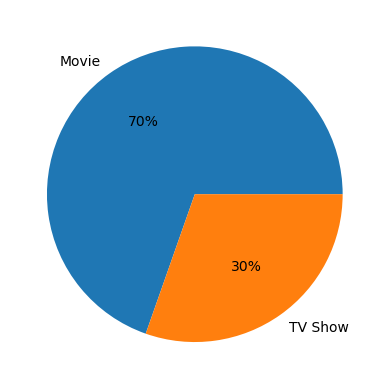

In [36]:
#-----------------------------------DISTRIBUTION OF MOVIES AND TV SHOWS---------------------------------------#
df1=df_merged.groupby(['type'])['title'].nunique().reset_index()
plt.pie(df1['title'],labels=df1['type'],autopct='%.0f%%')
plt.show()

In [37]:
#------------------------------PERCENTAGE OF MOVIES RELEASED AND ADDED IN NETFLIX IN THE SAME YEAR-----------------------#
df_m=df[(df['date_added'].dt.year==df['release_year']) & (df['type']=='Movie') & (df['date_added'].dt.year>=2015)]
df_m.shape[0]*100/df[df['type']=='Movie'].shape[0]

30.01141738704942

In [38]:
#--------------------------PERCENTAGE OF TV SHOWS RELEASED AND ADDED IN NETFLIX IN THE SAME YEAR--------------------------#
df_t=df[(df['date_added'].dt.year==df['release_year']) & (df['type']=='TV Show') & (df['date_added'].dt.year>=2015)]
df_t.shape[0]*100/df[df['type']=='TV Show'].shape[0]

51.45739910313901

* 51% of TV shows and 30% of movies are released and added in Netflix in the same year

OBJECTIVE 2 : COUNT OF MOVIE/TV SHOW RELEASES PER YEAR

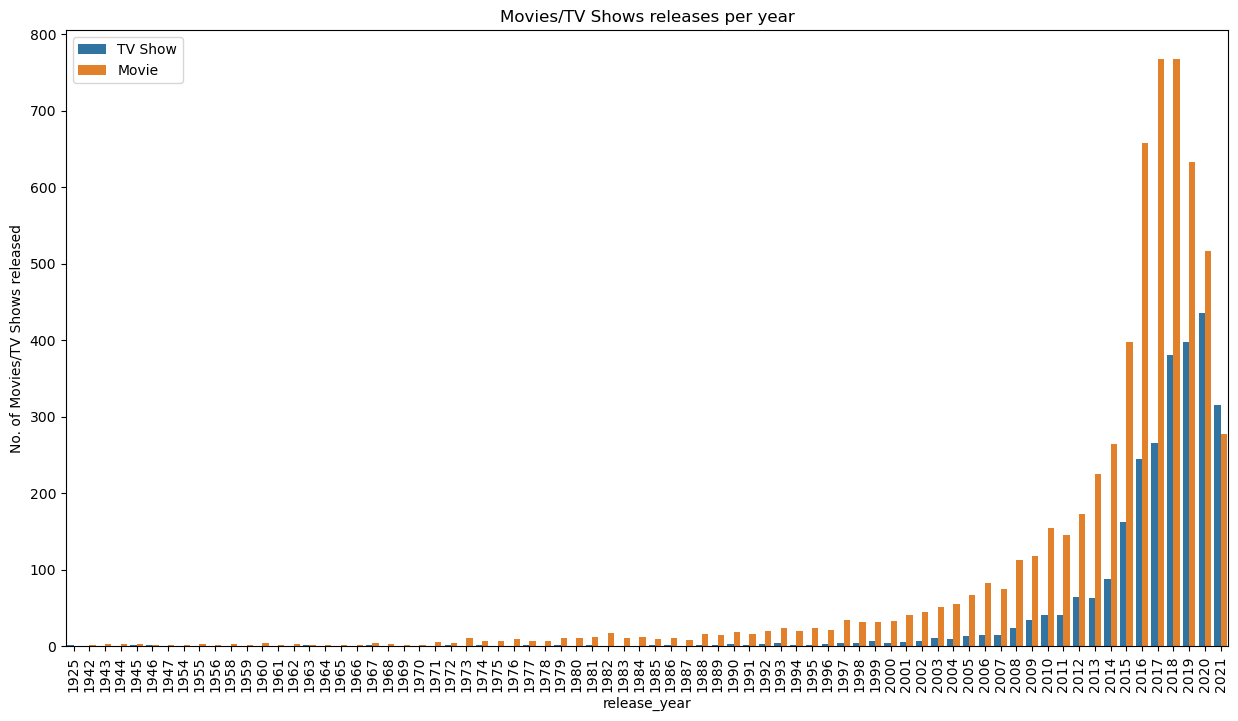

In [39]:
df2=df_merged.groupby(['release_year','type'])['title'].nunique().reset_index()
fig=plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
sns.barplot(data=df2,x='release_year',y='title',hue='type')
plt.ylabel('No. of Movies/TV Shows released')
plt.legend(loc='upper left')
plt.title('Movies/TV Shows releases per year')
plt.show()

* Number of movie releases & TV show releases were peaking till 2018 & 2020 respectively and then starts to dip
* The dip could be due to covid impacts
* Growth in movie releases was exponential as per the graph after 2000 till 2018
* In 2021, number of TV shows released were the highest which is an opposite trend compared to previous years where number of movies released were higher compared to TV shows.

OBJECTIVE 3 : COUNT OF MOVIE/TV SHOW ADDITIONS IN NETFLIX PER YEAR

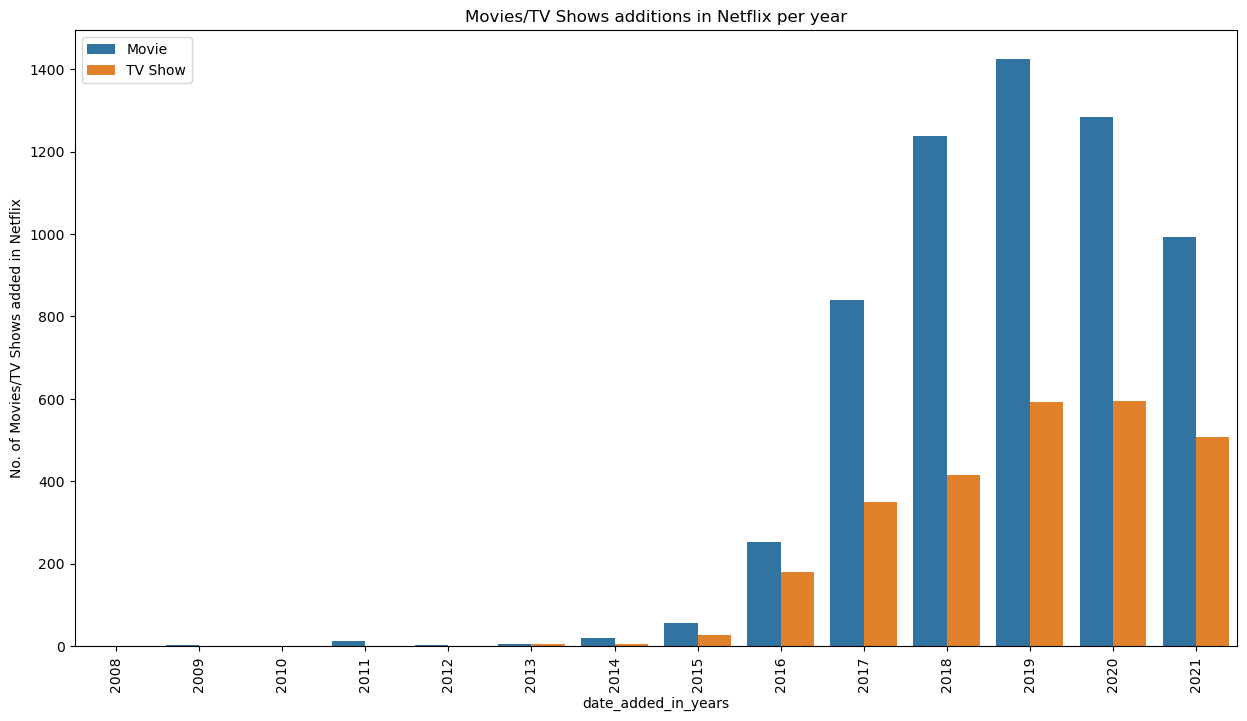

In [40]:
df_merged['date_added_in_years']=df_merged['date_added'].apply(lambda x:x.year)
df3=df_merged.groupby(['date_added_in_years','type'])['title'].nunique().reset_index()
fig=plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
sns.barplot(data=df3,x='date_added_in_years',y='title',hue='type')
plt.ylabel('No. of Movies/TV Shows added in Netflix')
plt.legend(loc='upper left')
plt.title('Movies/TV Shows additions in Netflix per year')
plt.show()

* Maximum movie additions happened in the year 2019.
* Movie additions are higher compared to TV Shows throughout the years.
* Even though TV show releases are higher in 2021, still the movie additions in Netflix are higher compared to TV shows which is an indication that Netflix prefers TV shows over movies

OBJECTIVE 4 : MONTH IN WHICH MAXIMUM MOVIE ADDITIONS HAPPENS IN NETFLIX

In [41]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added         0
release_year       0
rating             0
duration           0
listed_in          0
description        0
dtype: int64

# OUTLIER DETECTION

<AxesSubplot:>

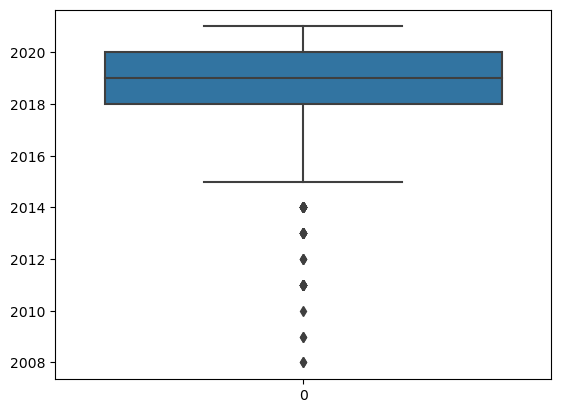

In [42]:
#*************************IDENTIFY THE OUTLIERS in date_added COLUMN FOR ANALYSING DATA**********************************#
sns.boxplot(data=df['date_added'].dt.year)

In [43]:
df['date_added'].dt.year.describe(include='all')

count    8807.000000
mean     2018.870785
std         1.574804
min      2008.000000
25%      2018.000000
50%      2019.000000
75%      2020.000000
max      2021.000000
Name: date_added, dtype: float64

In [44]:
iqr=2020-2018 # Inter quartile range

lower_whisker = 2018 - (1.5*iqr)
upper_whisker = 2020 + (1.5*iqr)

print(lower_whisker,upper_whisker)

# Max value of 2021 will be taken for the upper whisker since there are no data points between 2022 - 2023
# Data analysis will be between 2015 to 2021 ignoring outliers

2015.0 2023.0


<AxesSubplot:xlabel='date_added_in_months', ylabel='date_added_in_years'>

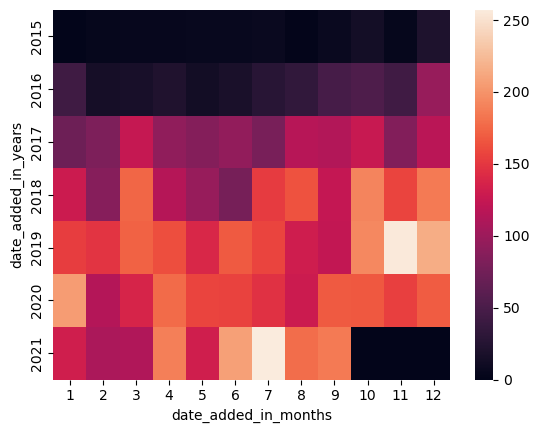

In [45]:
#*************************Extract months from date_added column*****************************#
df_merged['date_added_in_months']=df_merged['date_added'].apply(lambda x:x.month)
#*************************Filter years after 2015 removing outliers*****************************#
df4=df_merged.loc[(df_merged['date_added_in_years']>=2015)][['title','date_added_in_years','date_added_in_months']]
#*************************Create a pivot table to plot heat map*****************************#
df5=pd.pivot_table(data=df4.groupby(['date_added_in_years','date_added_in_months'])['title'].nunique().reset_index(),
                   index='date_added_in_years',columns='date_added_in_months',values='title').fillna(0)
sns.heatmap(df5)

* Looking at the years of maximum additions ( 2018, 2019, 2020 ), majority is observed in Oct, Nov, dec and Jan.
* In 2021, majority addition is observed after June. The reason could be because of higher number of releases in OTT platforms than theatres due to covid.
* It is 0 after october because the dataset is only available till september.
* February & March can be good options for new releases as the competitions will be lower

OBJECTIVE 5 : COUNT OF MOVIE/TV SHOW RELEASES IN DIFFERENT COUNTRIES

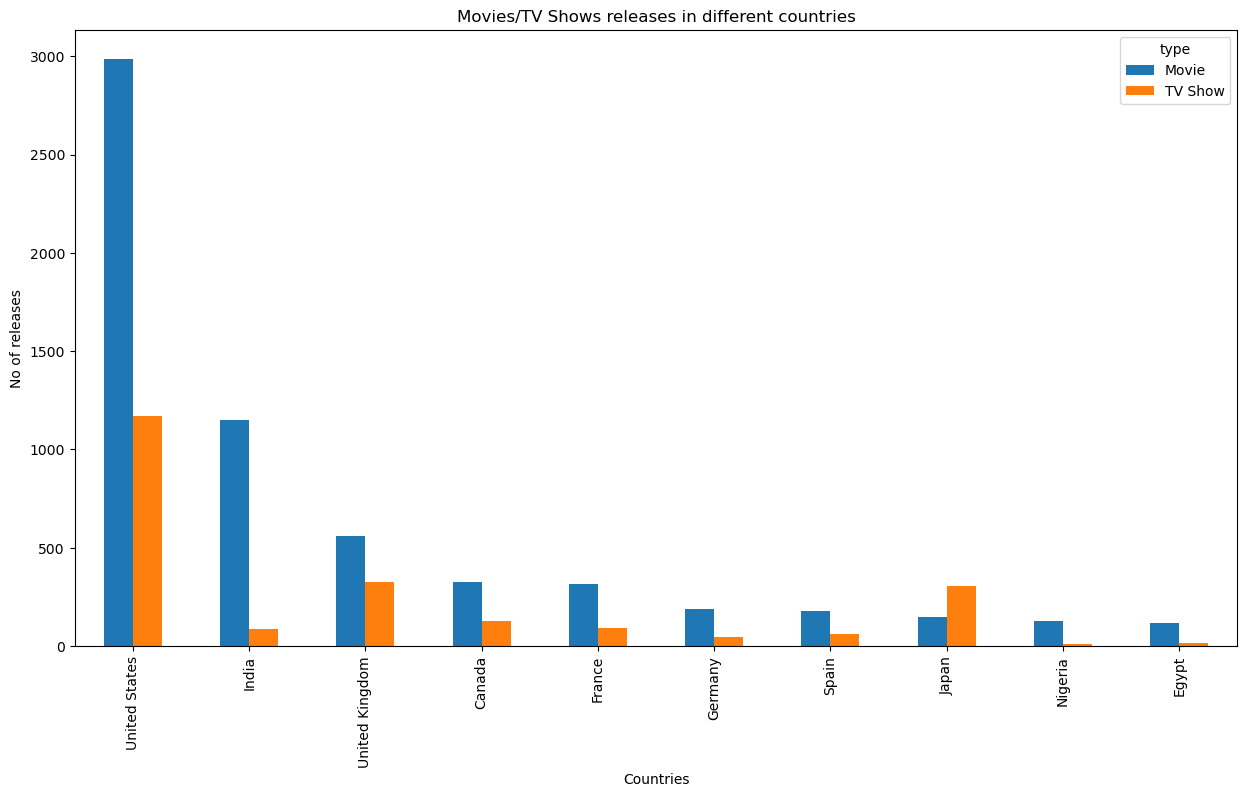

In [48]:
#****************************************MOVIES********************************************************************#
df5=df_merged.groupby(['country_y','type'])['title'].nunique().reset_index()
df6=pd.pivot_table(df5,index='country_y',columns='type',values='title').reset_index().sort_values(by='Movie',ascending=False).iloc[0:10]
df6.plot(x='country_y',kind='bar',stacked=False,figsize=(15,8),rot=90,ylabel='No of releases',xlabel='Countries')
plt.title('Movies/TV Shows releases in different countries')
plt.show()

In [49]:
df7=df_merged.groupby(['country_y'])['title'].nunique().reset_index()
df7['percentage_contribution']=(df7['title']*100/np.sum(df7['title'])).round(2)
df7.sort_values(by='percentage_contribution',ascending=False)

,country_y,title,percentage_contribution
119,United States,4155,37.53
47,India,1239,11.19
117,United Kingdom,889,8.03
55,Japan,453,4.09
22,Canada,452,4.08
...,...,...,...
54,Jamaica,1,0.01
99,Slovakia,1,0.01
36,Ethiopia,1,0.01
34,Ecuador,1,0.01


OBJECTIVE 6 : COUNT OF MOVIE/TV SHOW RELEASES IN TOP 5 COUNTRIES INDIVIDUALLY

<AxesSubplot:xlabel='release_year'>

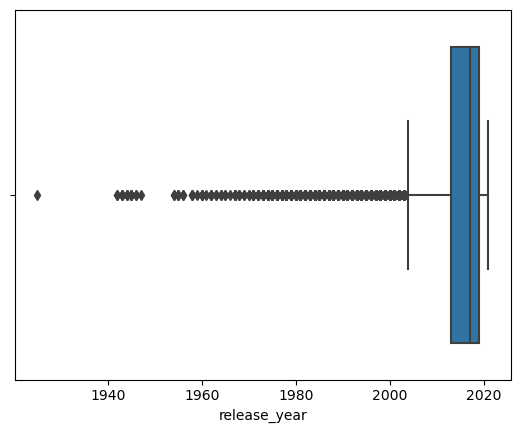

In [50]:
#*************************IDENTIFY THE OUTLIERS IN release_year COLUMNS FOR ANALYSING DATA****************************#
df['release_year']=df['release_year'].astype('int64')
sns.boxplot(data=df,x='release_year')

In [51]:
df['release_year'].describe(include='all')

count    8807.000000
mean     2014.180198
std         8.819312
min      1925.000000
25%      2013.000000
50%      2017.000000
75%      2019.000000
max      2021.000000
Name: release_year, dtype: float64

In [52]:
iqr=2019-2013 # Inter quartile range

lower_whisker = 2013 - (1.5*iqr)
upper_whisker = 2019 + (1.5*iqr)

print(lower_whisker,upper_whisker)

# Max value of 2021 will be taken for the upper whisker since there are no data points between 2022 - 2028
# Data analysis will be between 2004 to 2021 ignoring outliers

2004.0 2028.0


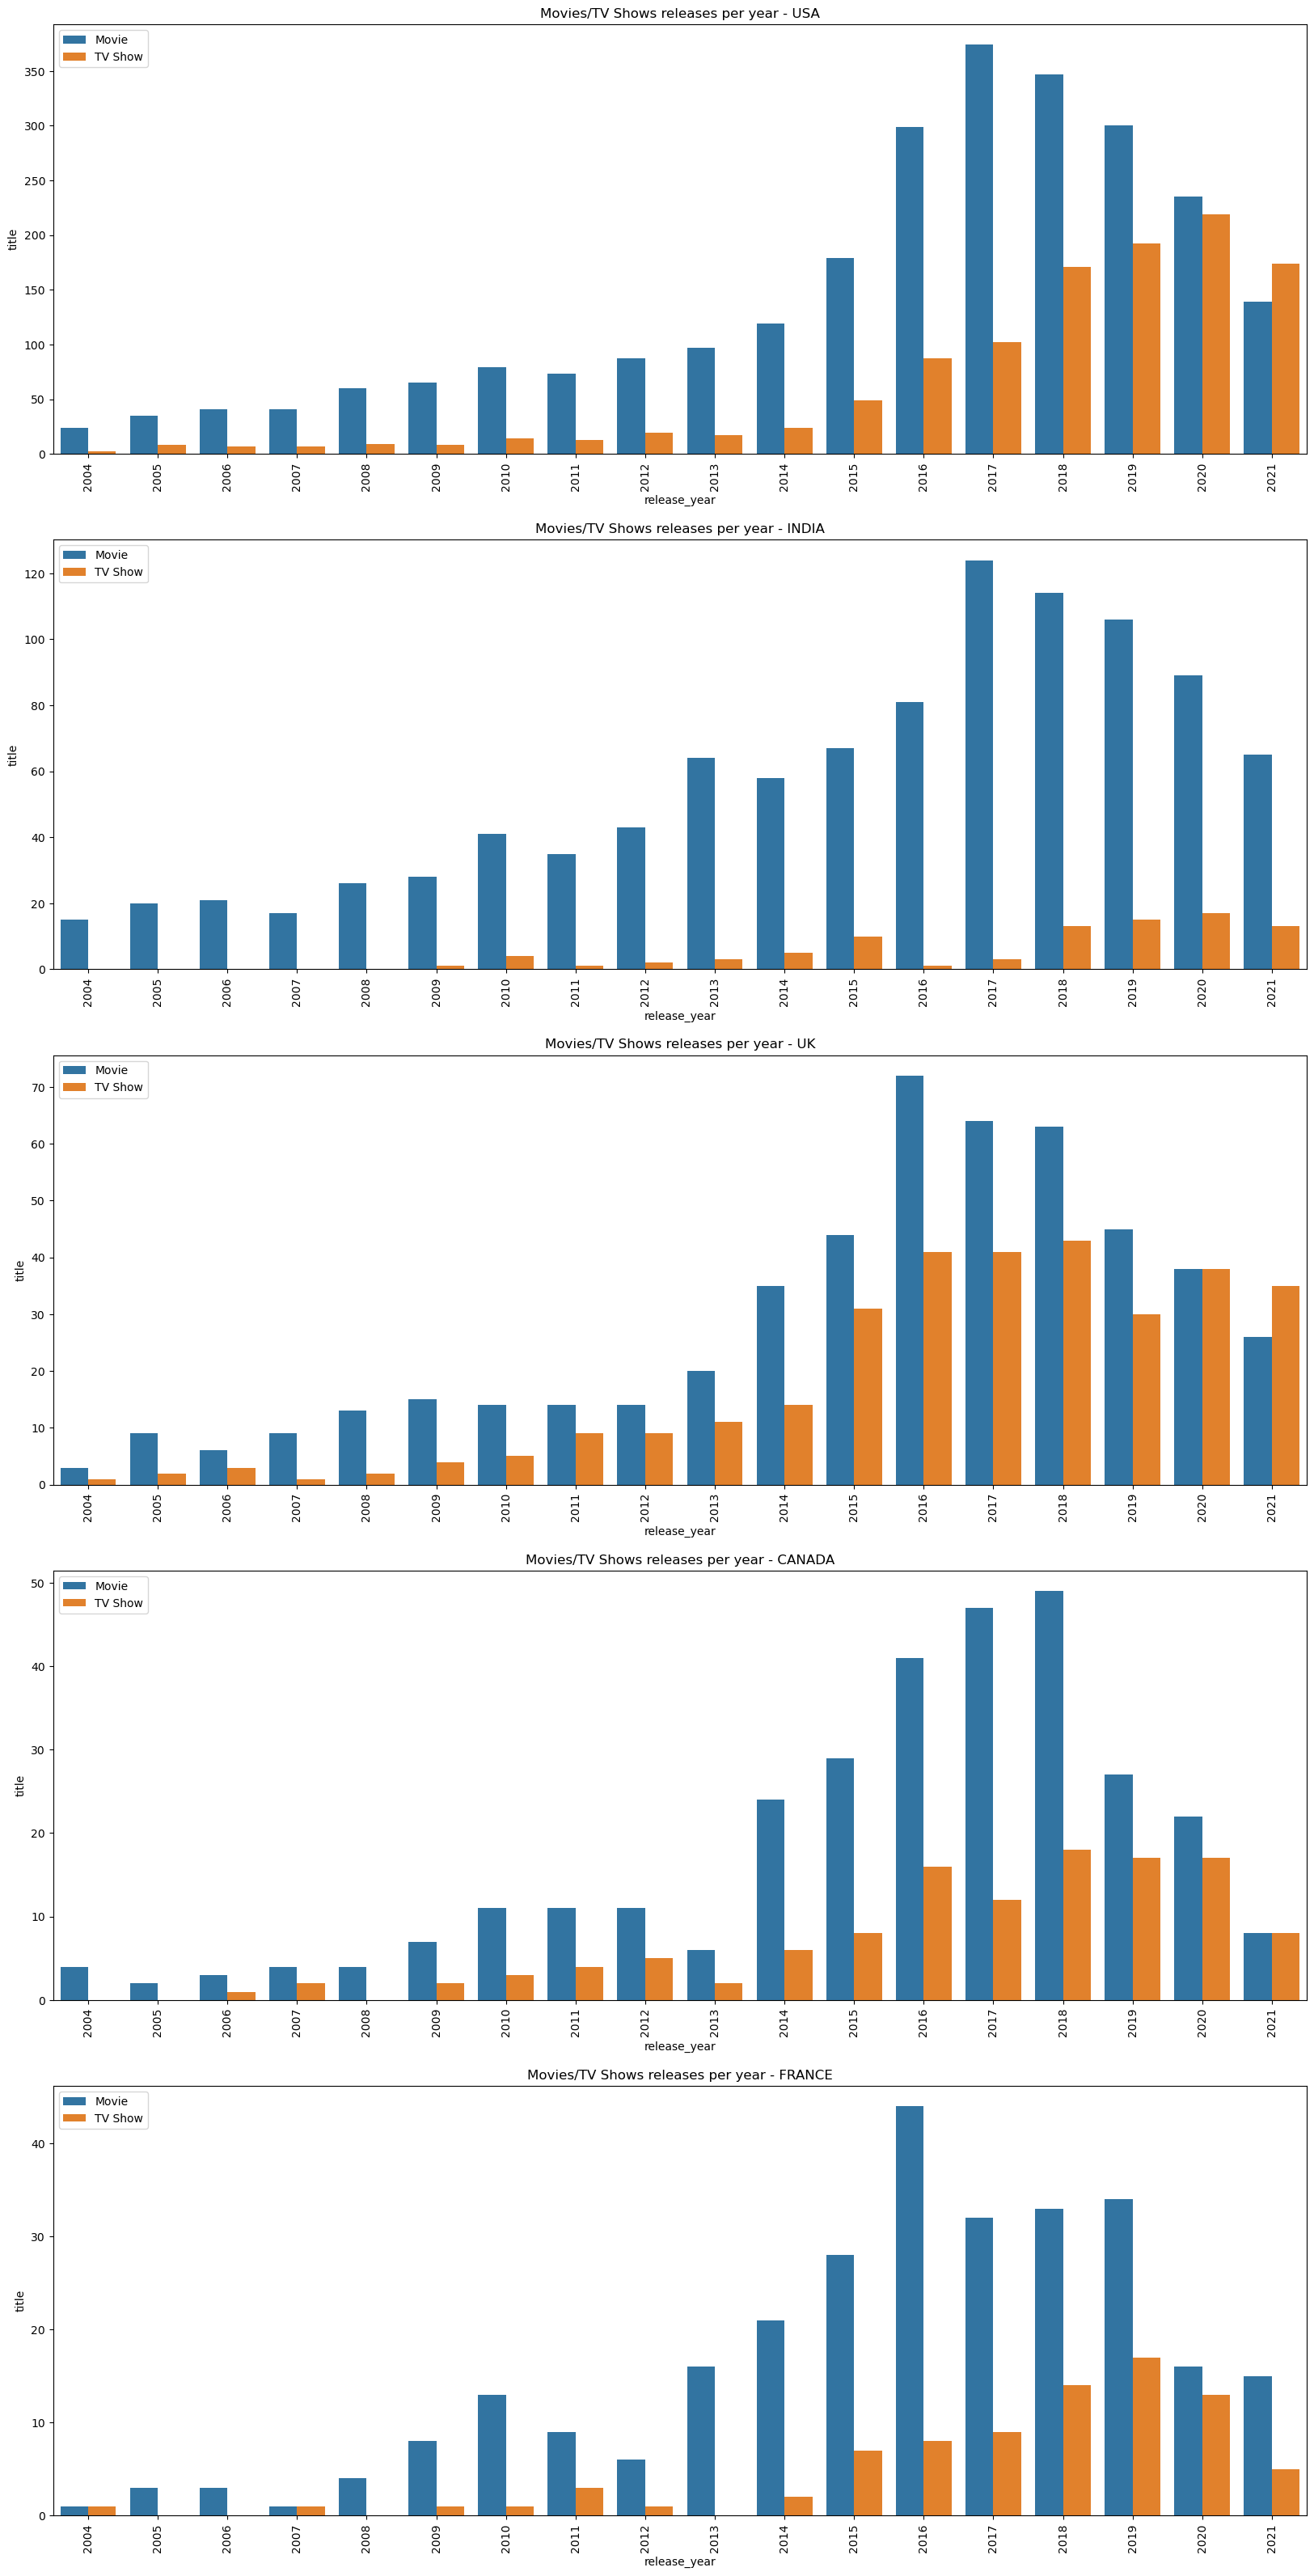

In [53]:
df8=df_merged[(df_merged['country_y']=='United States') & (df_merged['release_year'] >=2004)].groupby(['release_year','type'])['title'].nunique().reset_index()
df8a=df_merged[(df_merged['country_y']=='India') & (df_merged['release_year'] >=2004)].groupby(['release_year','type'])['title'].nunique().reset_index()
df8b=df_merged[(df_merged['country_y']=='United Kingdom') & (df_merged['release_year'] >=2004)].groupby(['release_year','type'])['title'].nunique().reset_index()
df8c=df_merged[(df_merged['country_y']=='Canada') & (df_merged['release_year'] >=2004)].groupby(['release_year','type'])['title'].nunique().reset_index()
df8d=df_merged[(df_merged['country_y']=='France') & (df_merged['release_year'] >=2004)].groupby(['release_year','type'])['title'].nunique().reset_index()
fig=plt.figure(figsize=(20,40))
plt.subplot(5,1,1)
plt.title('Movies/TV Shows releases per year - USA')
plt.xticks(rotation=90)
sns.barplot(data=df8,x='release_year',y='title',hue='type')
plt.legend(loc='upper left')
plt.subplot(5,1,2)
plt.title('Movies/TV Shows releases per year - INDIA')
plt.xticks(rotation=90)
sns.barplot(data=df8a,x='release_year',y='title',hue='type')
plt.legend(loc='upper left')
plt.subplot(5,1,3)
plt.title('Movies/TV Shows releases per year - UK')
plt.xticks(rotation=90)
sns.barplot(data=df8b,x='release_year',y='title',hue='type')
plt.legend(loc='upper left')
plt.subplot(5,1,4)
plt.title('Movies/TV Shows releases per year - CANADA')
plt.xticks(rotation=90)
sns.barplot(data=df8c,x='release_year',y='title',hue='type')
plt.legend(loc='upper left')
plt.subplot(5,1,5)
plt.title('Movies/TV Shows releases per year - FRANCE')
plt.xticks(rotation=90)
sns.barplot(data=df8d,x='release_year',y='title',hue='type')
plt.legend(loc='upper left')
plt.show()

* Trend in recent years shows an increase in production of TV Shows in US & UK and it overtook the movie production in 2021
* TV Shows are gaining popularity in Canada also
* India has been into movie production throughout the years

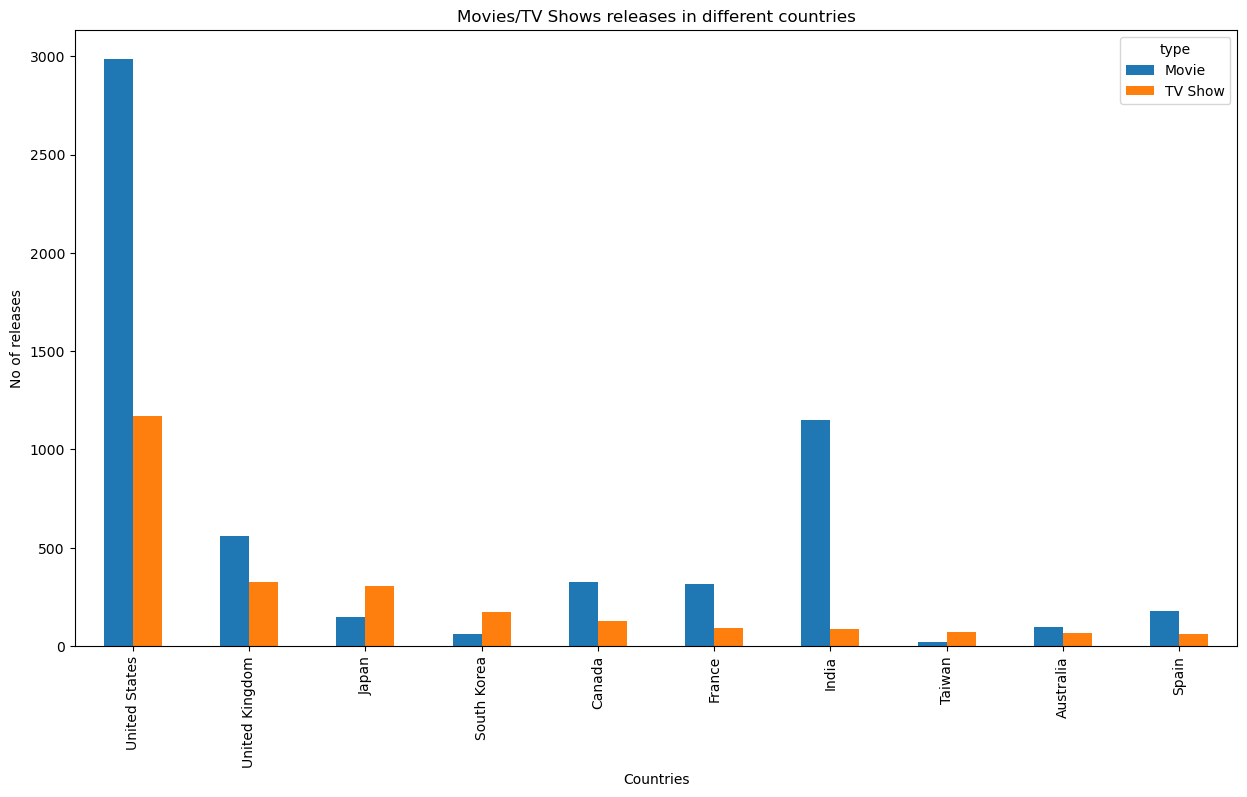

In [54]:
#****************************************TV SHOWS********************************************************************#
df9=df_merged.groupby(['country_y','type'])['title'].nunique().reset_index()
df10=pd.pivot_table(df9,index='country_y',columns='type',values='title').reset_index().sort_values(by='TV Show',ascending=False).iloc[0:10]
df10.plot(x='country_y',kind='bar',stacked=False,figsize=(15,8),rot=90,ylabel='No of releases',xlabel='Countries')
plt.title('Movies/TV Shows releases in different countries')
plt.show()

* United States is in the top spot on number of movies and TV Shows available in Netflix
* India is second in movies while at 7th position in TV Shows
* Countries like Japan, South Korea, Taiwan are producers of TV Shows compared to Movies

OBJECTIVE 7 : GENRES WITH HIGHEST COUNTS 

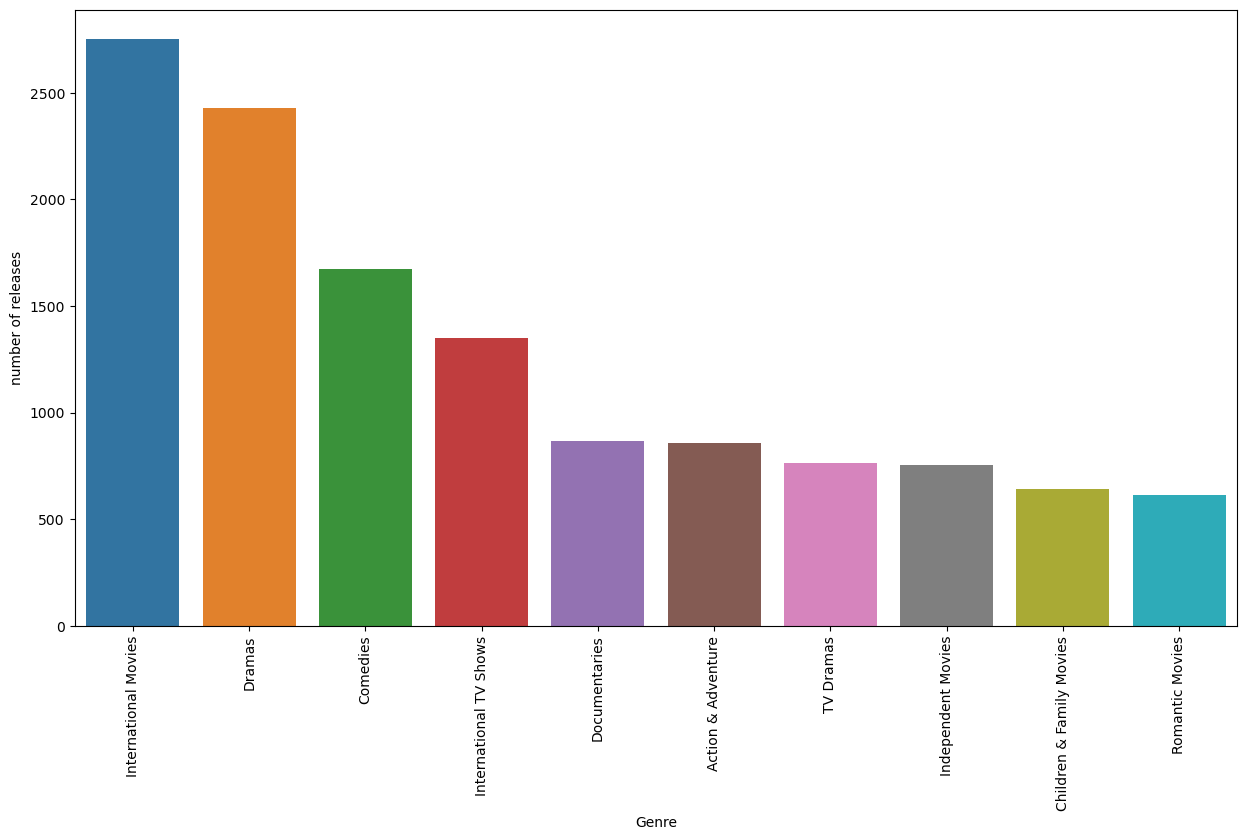

In [55]:
df11=df_merged.groupby('genre')['title'].nunique().reset_index().sort_values(by='title',ascending=False).iloc[0:10]
fig=plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
sns.barplot(data=df11,x='genre',y='title')
plt.ylabel('number of releases')
plt.xlabel('Genre')
plt.show()

International Movies, Dramas, Comedies, International TV Shows and documentaries are top 5 genres

OBJECTIVE 8 : COUNTRIES WITH DIFFERENT GENRE PREFERENCES

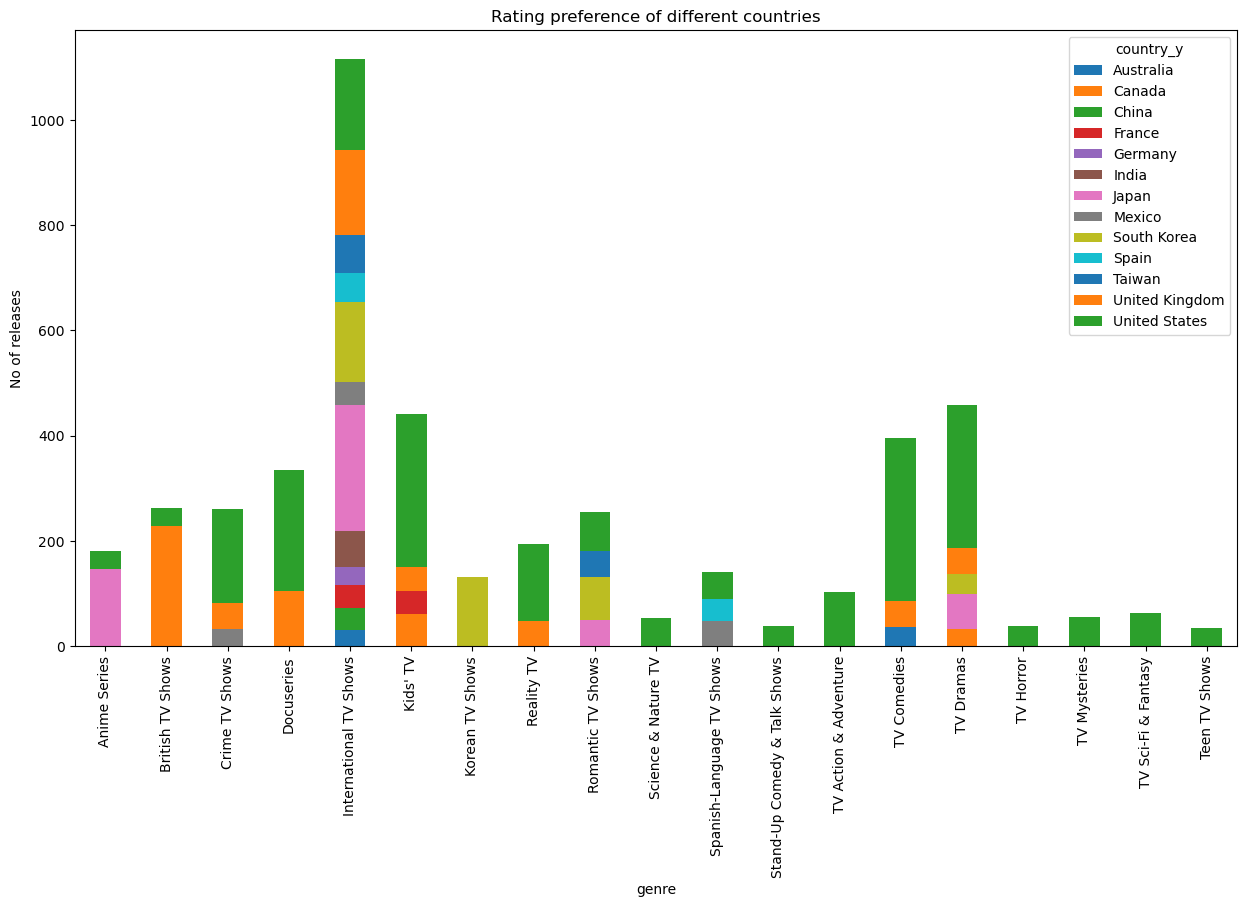

In [56]:
#*****************************GENRE PREFERENCE IN TV SHOWS***************************************#
df12=df_merged[df_merged['type']=='TV Show'].groupby(['genre','country_y'])['title'].nunique().reset_index().sort_values(by='title',ascending=False).iloc[0:50]
df13=pd.pivot_table(df12,index='genre',columns='country_y',values='title')
df13.plot(kind='bar',stacked=True,figsize=(15,8),rot=90,ylabel='No of releases',xlabel='genre')
plt.title('Rating preference of different countries')
plt.show()

TVS SHOWS CATEGORY

* Japan dominates in animes and in international TV shows
* USA dominates in Kids TV, Science, action & adventure, comedies, dramas, crime TV shows

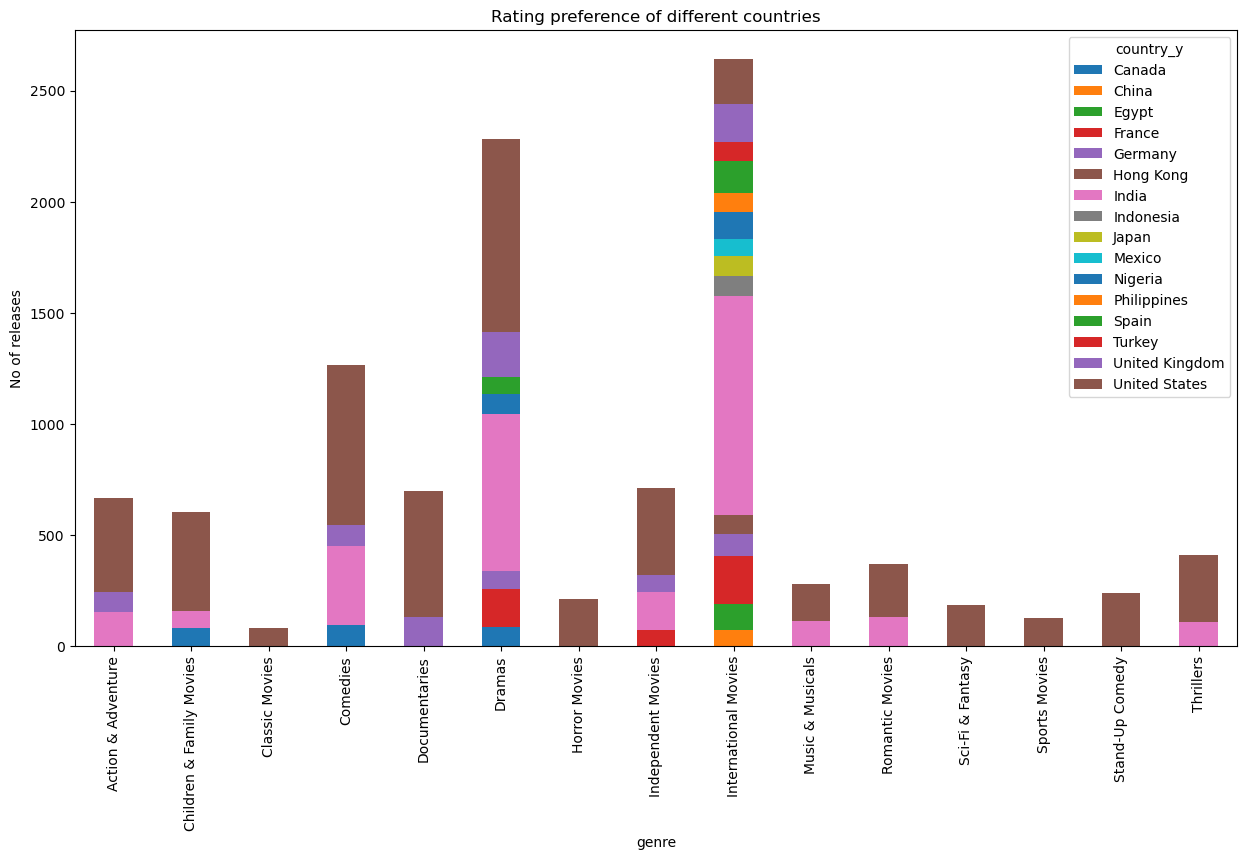

In [57]:
#*****************************GENRE PREFERENCE IN MOVIES***************************************#
df12=df_merged[df_merged['type']=='Movie'].groupby(['genre','country_y'])['title'].nunique().reset_index().sort_values(by='title',ascending=False).iloc[0:50]
df13=pd.pivot_table(df12,index='genre',columns='country_y',values='title')
df13.plot(kind='bar',stacked=True,figsize=(15,8),rot=90,ylabel='No of releases',xlabel='genre')
plt.title('Rating preference of different countries')
plt.show()

MOVIES CATEGORY
* USA is a monopoly in Sci-Fi, sports, horror and classic movies and dominates in action & adventure, documentaries, children and family movies.
* India mostly prefer International movies and dramas, comedies, musical, romance and thrillers

OBJECTIVE 9 : DURATIONS OF MOVIES AND TV SHOWS

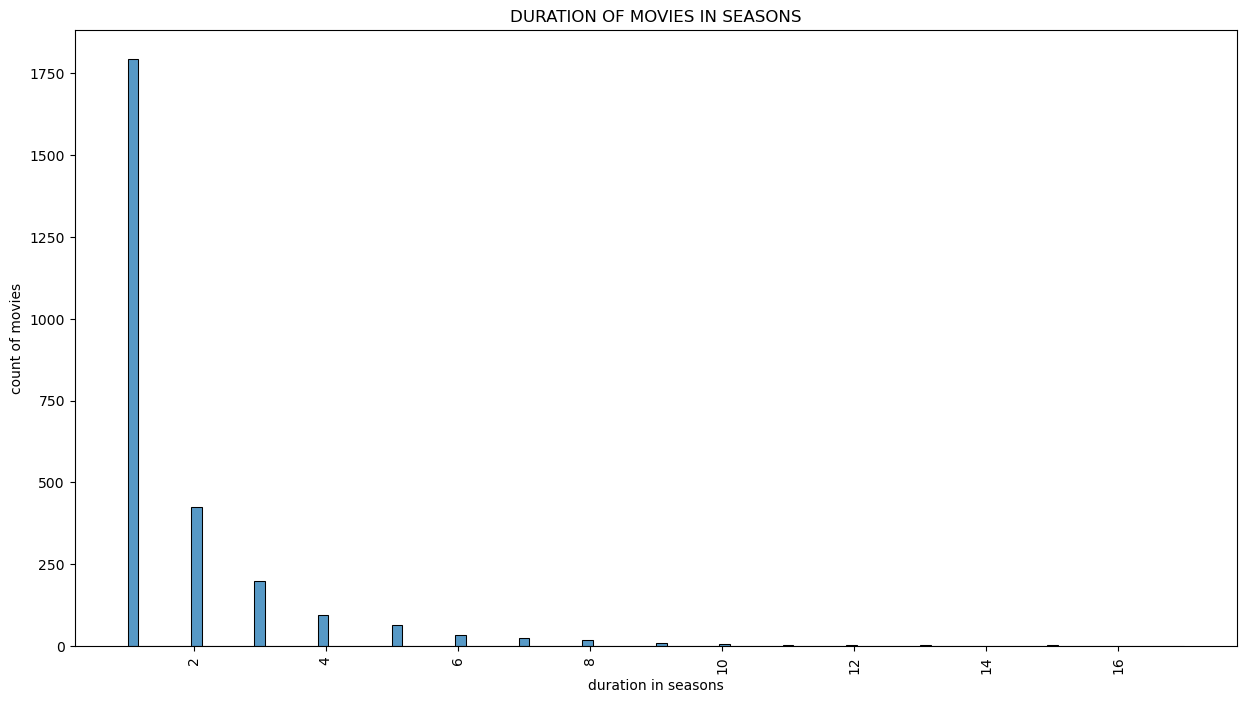

In [58]:
#*************************************************TV SHOWS********************************************************#
df14=df_merged[df_merged['type']=='TV Show'].groupby('title')['duration'].mean().round(0).reset_index()
fig=plt.figure(figsize=(15,8))
plt.title('DURATION OF MOVIES IN SEASONS')
plt.xticks(rotation=90)
sns.histplot(data=df14,x='duration',bins=100)
plt.ylabel('count of movies')
plt.xlabel('duration in seasons')
plt.show()

Majority of TV Shows are having only 1 season

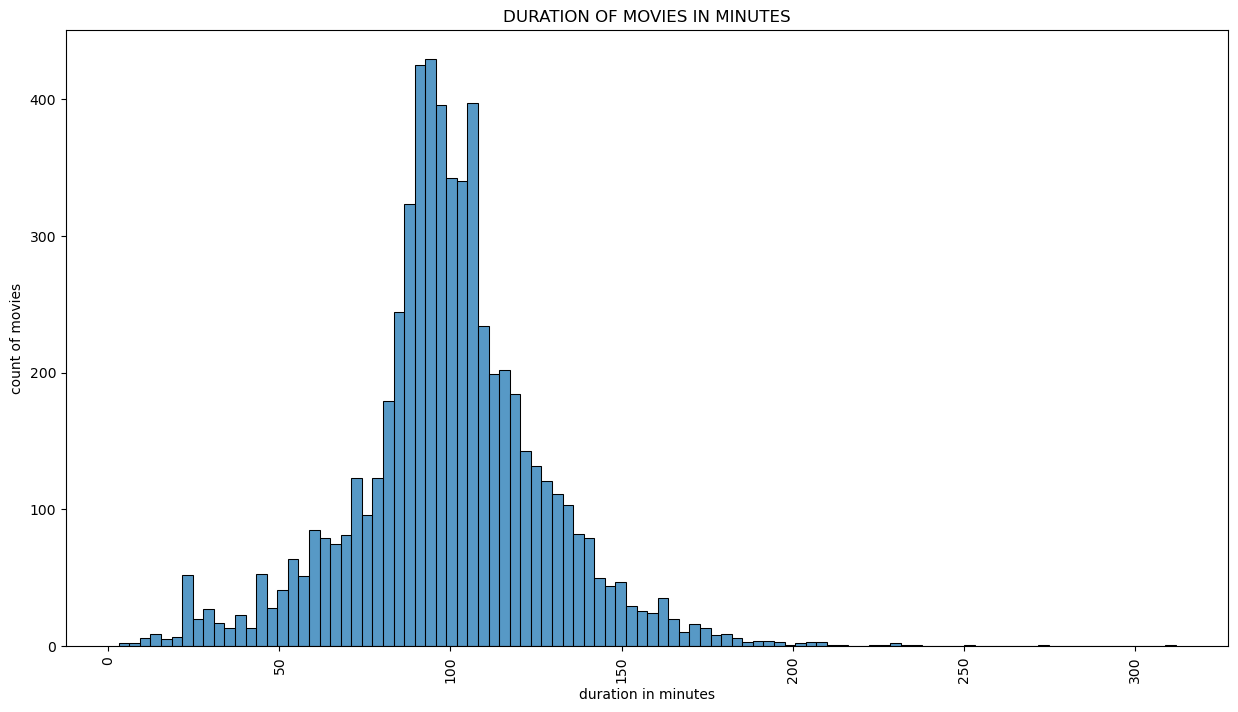

In [59]:
#*************************************************MOVIES********************************************************#
df15=df_merged[df_merged['type']=='Movie'].groupby('title')['duration'].mean().round(0).reset_index()
fig=plt.figure(figsize=(15,8))
plt.title('DURATION OF MOVIES IN MINUTES')
plt.xticks(rotation=90)
sns.histplot(data=df15,x='duration',bins=100)
plt.ylabel('count of movies')
plt.xlabel('duration in minutes')
plt.show()

In [60]:
df15['duration'].mean()

99.56499755341706

* Duration forms a normal distribution with mean value around 100 minutes

OBJECTIVE 10 : RATING PREFERENCES AND DISTRIBUTION IN DIFFERENT COUNTRIES

In [61]:
df16tv=df_merged[df_merged['type']=='TV Show'].groupby(['rating'])['title'].nunique().reset_index().sort_values(by='title',ascending=False)
df16tv['percentage_contribution']=(df16tv['title']*100/np.sum(df16tv['title'])).round(2)
df16tv

,rating,title,percentage_contribution
4,TV-MA,1145,42.79
2,TV-14,733,27.39
5,TV-PG,323,12.07
7,TV-Y7,195,7.29
6,TV-Y,176,6.58
3,TV-G,94,3.51
0,NR,7,0.26
1,R,2,0.07
8,TV-Y7-FV,1,0.04


In [62]:
df16mv=df_merged[df_merged['type']=='Movie'].groupby(['rating'])['title'].nunique().reset_index().sort_values(by='title',ascending=False)
df16mv['percentage_contribution']=(df16mv['title']*100/np.sum(df16mv['title'])).round(2)
df16mv

,rating,title,percentage_contribution
8,TV-MA,2062,33.63
6,TV-14,1427,23.28
5,R,797,13.00
9,TV-PG,540,8.81
4,PG-13,490,7.99
3,PG,287,4.68
11,TV-Y7,139,2.27
10,TV-Y,131,2.14
7,TV-G,126,2.06
2,NR,83,1.35


* TV-MA rating is the most preferred accounting for 42% in TV shows and 33% in Movies
* TV-14 rating is in the second position accounting for 27% in TV shows and 23% in Movies

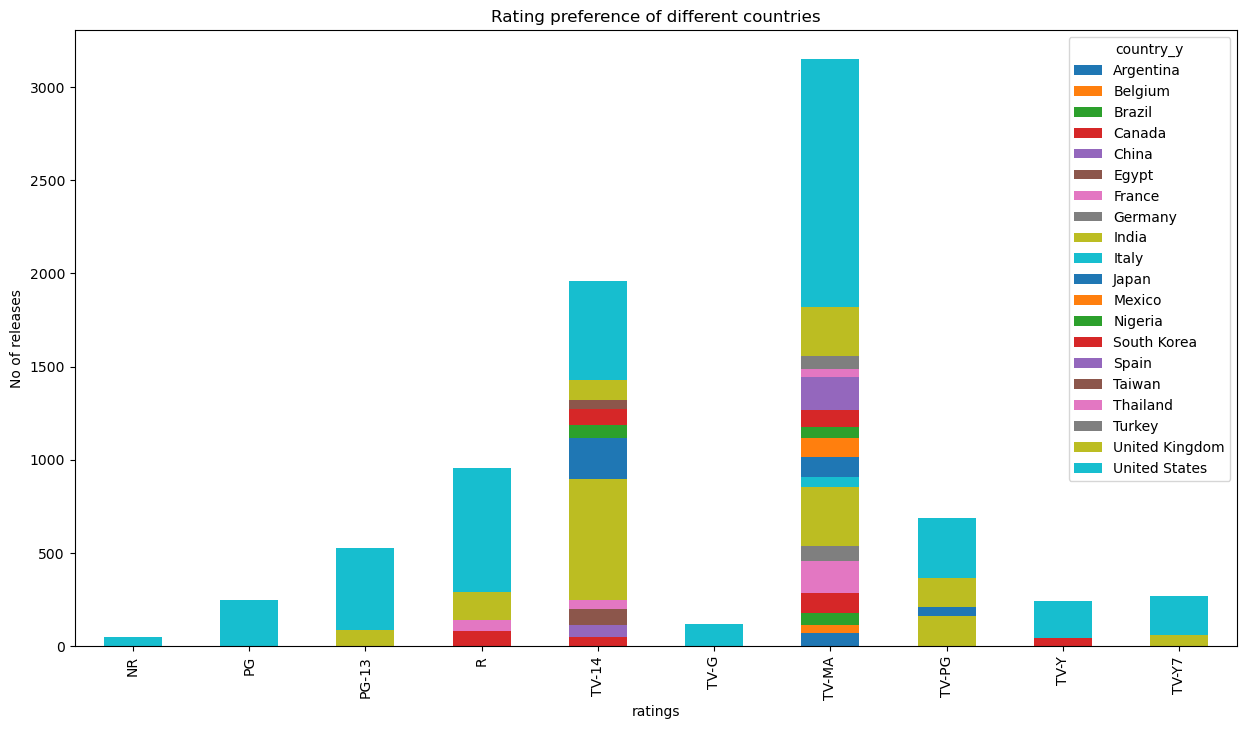

In [63]:
df16=df_merged.groupby(['rating','country_y'])['title'].nunique().reset_index().sort_values(by='title',ascending=False).iloc[0:45]
df16a=pd.pivot_table(df16,index='rating',columns='country_y',values='title')
df16a.plot(kind='bar',stacked=True,figsize=(15,8),rot=90,ylabel='No of releases',xlabel='ratings')
plt.title('Rating preference of different countries')
plt.show()

First Preferences of Countries : 
* TV-14 - India, Japan, Egypt, Nigeria, China
* TV-MA - USA, UK, Spain, France, Canada, Mexico, South Korea, Germany, Turkey, Argentina, Brazil, Italy, Belgium, Thailand

OBJECTIVE 11 : ACTORS WITH HIGHEST NUMBER OF RELEASES

In [64]:
df17=df_merged.groupby(['cast_y','country_y'])['title'].nunique().reset_index().sort_values(by='title',ascending=False)
df17a=df17

* Craig Sechier is the most popular actor followed by David Attenborough, Anupam Kher, Samuel West and Mike Colter in top 5
* US dominates the list which is obvious due to highest number of Movie/TV Show production

In [65]:
df18=df_merged.groupby(['director_y','country_y'])['title'].nunique().reset_index().sort_values(by='title',ascending=False)
df18.head(10)

,director_y,country_y,title
1486,Danny Cannon,United States,476
6627,Thomas Astruc,United States,320
4900,Noam Murro,United Kingdom,281
7113,Yasuhiro Irie,Japan,277
3554,Kenny Ortega,United States,249
3538,Ken Burns,United States,168
6188,Shin Won-ho,South Korea,154
4510,Michael Simon,United States,127
5663,Rob Seidenglanz,United States,95
4901,Noam Murro,United States,87


* Danny Cannon is the most popular director followed by Thomas Astruc, Noam Murro, yasuhiro Irie and kenny Ortega in top 5
* US dominates the list which is obvious due to highest number of Movie/TV Show production

OBJECTIVE 11 : ACTOR,DIRECTOR PAIR WITH HIGHEST NUMBER OF RELEASES

In [66]:
df19=df_merged.groupby(['director_y','cast_y'])['title'].nunique().reset_index().sort_values(by='title',ascending=False)
df19.head(10)

,director_y,cast_y,title
34480,Ken Burns,David Attenborough,91
49436,Noam Murro,David Attenborough,67
45932,Michael Simon,Rutledge Wood,44
14459,Danny Cannon,David Attenborough,39
16795,Danny Cannon,Mike Colter,35
64619,Simon Frederick,David Attenborough,33
69595,Thomas Astruc,Andrea Libman,25
75115,Yasuhiro Irie,Anupam Kher,24
77206,Yasuhiro Irie,Takahiro Sakurai,23
22451,Everardo Gout,David Attenborough,23


OBJECTIVE 12 : COUNTRIES WITH DURATION ABOVE THE AVERAGE VALUE

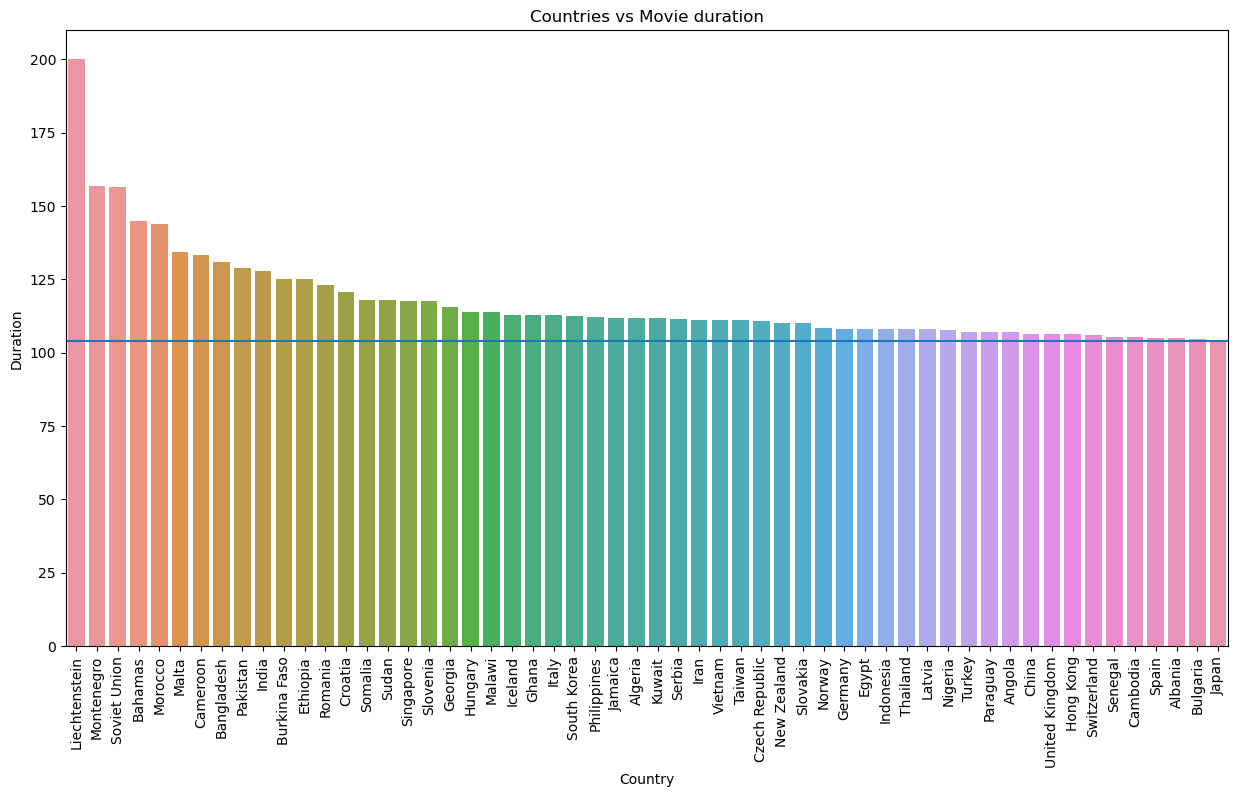

In [67]:
df20=df_merged[df_merged['type']=='Movie'].groupby('country_y')['duration'].mean().round(2).reset_index()
df21=df20[df20['duration']>=df20['duration'].mean()].sort_values(by='duration',ascending=False)
fig=plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
graph=sns.barplot(data=df21,x='country_y',y='duration')
graph.axhline(df20['duration'].mean())
plt.ylabel('Duration')
plt.xlabel('Country')
plt.title('Countries vs Movie duration')
plt.show()

In [68]:
df21.count()[0]

56

* There are 56 out of 127 countries with duration more than the average value 
* Horizontal line shows the mean value around 103 minutes

# SUMMARY / INSIGHTS

* Dataset covers period between 1st Jan 2008 to 25th Sep 2021
* Movies type accounts for the highest numbers (70%) in Netflix compared to TV shows (30%)
* 51% of TV shows are released and added in the same year while the value is 30% for movies
* Top 5 movie producers - US, India, UK, Canada, France 
* Top 5 TV Show producers - US, UK, Japan, South Korea, Canada
* Majority of the countries focuses on Movie while few countries like Japan, South Korea, Taiwan are more focused on producing TV Shows from the beginning.
* In 2021, number of TV shows overtook the count of movies.
* Maximum additions of movies and TV shows happens in the last quarter of the year. Recently in 2021, it has started happening from 3rd quarter itself.
* International Movies, Dramas, Comedies, International TV Shows and documentaries are top 5 genres
* Majority of TV Shows are only having 1 season while average movie duration is around 100-103 minutes.
* There are 56 out of 127 countries with movie duration more than the average value of 103 minutes
* 36% of movies are having TV-MA rating followed by TV-14 rating at 24%.
* Major countries with production under TV-14 ratings - India, Japan, Egypt, Nigeria, China.
* Major countries with production under TV-MA rating - USA, UK, Spain, France, Canada, Mexico, South Korea, Germany, Turkey, Argentina, Brazil, Italy, Belgium, Thailand.
* In terms of genres, USA dominates the Sci-Fi, sports movies, TV comedy, action & adventure, romance, dramas, crime TV shows children movies, thrillers and horror. India mostly prefer International movies, dramas, comedies, musical, romance and thrillers. Anime series are dominated by Japan

# RECOMMENDATIONS

* Since movie/TV show additions happens mostly at the last quarter, Netflix should be prepared with higher server capacity and customer supports in the last quarter.
* February & March can be good options for new releases as the competitions will be lower.
* TV show productions are rising in recent years in US & UK who accounts for 45% of worlds movie and TV show production. Since more than 50% of TV shows released are added in Netflix in the same year, the number of viewers will increase as  majority will be first time viewers. So advertisements can be posted more on TV Shows compared to movies to increase visibility.
* Netflix production of TV shows can be looked at.
* Increased preference of TV shows also is a challenge on storage.On average, 1 season consists of 8-10 episodes with 40-60 min duration each which accounts to 320 to 600 mintutes. It is 3 to 6 times the average duration of a movie. Reference of the data is from Netflixlife.com.